In [ ]:
import pandas as pd
original = pd.read_csv("/content/drive/MyDrive/Fish_growth/fish_daily_report.csv", encoding='cp949')

In [ ]:
original

,No,양식장,날짜,라벨,라벨2(어장_수조_샘플번호_날짜_길이_무게_사이즈),체장(mm),체중(g),수조번호,사육미수,일일폐사량,사료정보,일일 사료 급이량(KG),투약일자,약품명,투여량(ML 또는 L),투여단위,투여방법,기타사항,검출 병원체
0,88,OS,220704,OS070401,F01_U01_O0088_D2022-07-04_L420_W0749_S3,420,749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
1,89,OS,220704,OS070402,F01_U01_O0089_D2022-07-04_L335_W0379_S2,335,379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
2,90,OS,220704,OS070403,F01_U01_O0090_D2022-07-04_L325_W0295_S2,325,295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
3,91,OS,220704,OS070404,F01_U01_O0091_D2022-07-04_L345_W0407_S2,345,407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
4,92,OS,220704,OS070405,F01_U01_O0092_D2022-07-04_L370_W0573_S3,370,573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3797,3798,GM,221111,GM111101,F20_U01_O3798_D2022-11-25_L220_W0083_S1,220,83,10동3,8000.0,NaN,배합사료(EP),80.0,NaN,NaN,NaN,NaN,NaN,NaN,0
3798,3799,GM,221111,GM111102,F20_U01_O3799_D2022-11-25_L220_W0078_S1,220,78,10동3,8000.0,NaN,배합사료(EP),80.0,NaN,NaN,NaN,NaN,NaN,NaN,0
3799,3800,GM,221111,GM111103,F20_U01_O3800_D2022-11-25_L200_W0061_S1,200,61,10동3,8000.0,NaN,배합사료(EP),80.0,NaN,NaN,NaN,NaN,NaN,NaN,0
3800,3801,GM,221111,GM111104,F20_U01_O3801_D2022-11-25_L240_W0108_S1,240,108,10동4,6000.0,NaN,배합사료(EP),80.0,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
original.drop(columns=['No','라벨','라벨2(어장_수조_샘플번호_날짜_길이_무게_사이즈)','일일폐사량','투약일자', '약품명', '투여량(ML 또는 L)', '투여단위', '투여방법', '기타사항', '검출 병원체', '수조번호'], inplace = True)

In [ ]:
original.dropna(inplace=True)
original['개별 사료 급이량(g)'] = (original['일일 사료 급이량(KG)'].values / original['사육미수'].values) * 1000
original.drop(columns=['사육미수','일일 사료 급이량(KG)'], inplace=True)
original

,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
15,IC,220704,345,500,생사료(MP),29.090909
16,IC,220704,380,673,생사료(MP),29.090909
17,IC,220704,355,410,생사료(MP),29.090909
18,IC,220704,330,312,생사료(MP),29.090909
19,IC,220704,345,514,생사료(MP),29.090909
...,...,...,...,...,...,...
3797,GM,221111,220,83,배합사료(EP),10.000000
3798,GM,221111,220,78,배합사료(EP),10.000000
3799,GM,221111,200,61,배합사료(EP),10.000000
3800,GM,221111,240,108,배합사료(EP),13.333333


In [ ]:
grouped = original.groupby('양식장')

In [ ]:

from IPython.display import display

for name, group in grouped:
    print(f"Group: {name}, 총 개체수 {len(group)}")
    display(group)
# HM(1143), IC(1506), OS(631, NAN 데이터 살짝) TP(447)

Group: DK, 총 개체수 1


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
2677,DK,220930,305,252,생사료(MP),33.333333


Group: DS, 총 개체수 1


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
2676,DS,220930,300,265,생사료(MP),33.333333


Group: GM, 총 개체수 15


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
3357,GM,221027,155,40,배합사료(EP),10.000000
3358,GM,221027,120,16,배합사료(EP),10.000000
3359,GM,221027,130,20,배합사료(EP),10.000000
3360,GM,221027,165,43,배합사료(EP),10.000000
3361,GM,221027,130,15,배합사료(EP),10.000000
3362,GM,221027,135,21,배합사료(EP),10.000000
3363,GM,221027,125,14,배합사료(EP),10.000000
3364,GM,221027,130,16,배합사료(EP),10.000000
3365,GM,221027,120,13,배합사료(EP),10.000000
3366,GM,221027,130,21,배합사료(EP),10.000000


Group: HB, 총 개체수 2


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
3120,HB,221018,444,718,생사료(MP),45.454545
3121,HB,221018,400,641,생사료(MP),45.454545


Group: HD, 총 개체수 10


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
797,HD,220803,310,293,생사료(MP),22.857143
798,HD,220803,310,378,생사료(MP),22.857143
799,HD,220803,265,189,생사료(MP),22.857143
1019,HD,220810,290,241,생사료(MP),22.857143
1020,HD,220810,290,206,생사료(MP),22.857143
1021,HD,220810,305,258,생사료(MP),22.857143
2078,HD,220914,205,74,생사료(MP),10.000000
2079,HD,220914,200,62,생사료(MP),10.000000
2080,HD,220914,330,324,생사료(MP),22.857143
2081,HD,220914,320,363,생사료(MP),22.857143


Group: HJ, 총 개체수 2


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
3010,HJ,221014,370,323,생사료(MP),31.25
3011,HJ,221014,390,488,생사료(MP),31.25


Group: HM, 총 개체수 941


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
58,HM,220705,265,216,생사료(MP),21.917808
59,HM,220705,230,149,생사료(MP),21.917808
60,HM,220705,240,173,생사료(MP),21.917808
61,HM,220705,245,172,생사료(MP),21.917808
62,HM,220705,235,176,생사료(MP),21.917808
...,...,...,...,...,...,...
3634,HM,221107,330,319,생사료(MP),28.571429
3635,HM,221107,360,463,생사료(MP),28.571429
3636,HM,221107,320,306,생사료(MP),28.571429
3637,HM,221107,325,337,생사료(MP),28.571429


Group: HY, 총 개체수 2


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
740,HY,220801,290,181,배합사료(EP),31.25
741,HY,220801,340,408,배합사료(EP),31.25


Group: IC, 총 개체수 1389


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
15,IC,220704,345,500,생사료(MP),29.090909
16,IC,220704,380,673,생사료(MP),29.090909
17,IC,220704,355,410,생사료(MP),29.090909
18,IC,220704,330,312,생사료(MP),29.090909
19,IC,220704,345,514,생사료(MP),29.090909
...,...,...,...,...,...,...
3792,IC,221111,165,43,배합사료(EP),6.779661
3793,IC,221111,175,54,배합사료(EP),6.779661
3794,IC,221111,160,40,배합사료(EP),6.779661
3795,IC,221111,155,32,배합사료(EP),6.779661


Group: IS, 총 개체수 1


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
3168,IS,221019,330,310,생사료(MP),26.666667


Group: JH, 총 개체수 20


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
983,JH,220809,360,499,생사료(MP),28.571429
984,JH,220809,335,388,생사료(MP),28.571429
985,JH,220809,360,430,생사료(MP),28.571429
986,JH,220809,420,715,생사료(MP),28.571429
1128,JH,220816,360,527,생사료(MP),26.666667
1129,JH,220816,395,484,생사료(MP),26.666667
1130,JH,220816,370,603,생사료(MP),26.666667
1131,JH,220816,430,883,생사료(MP),26.666667
1132,JH,220816,420,705,생사료(MP),26.666667
1133,JH,220816,410,798,생사료(MP),26.666667


Group: KL, 총 개체수 1


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
3169,KL,221019,385,386,생사료(MP),26.666667


Group: OS, 총 개체수 449


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
243,OS,220712,300,290,생사료(MP),28.571429
244,OS,220712,310,243,생사료(MP),28.571429
245,OS,220712,405,697,생사료(MP),28.571429
246,OS,220712,345,452,생사료(MP),28.571429
247,OS,220712,305,271,생사료(MP),28.571429
...,...,...,...,...,...,...
3644,OS,221107,375,563,생사료(MP),25.714286
3645,OS,221107,400,627,생사료(MP),28.571429
3646,OS,221107,365,456,생사료(MP),28.571429
3647,OS,221107,360,333,생사료(MP),28.571429


Group: SD, 총 개체수 2


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
3020,SD,221014,480,989,생사료(MP),50.0
3021,SD,221014,450,1046,생사료(MP),50.0


Group: SW, 총 개체수 2


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
3108,SW,221018,335,294,생사료(MP),40.0
3109,SW,221018,355,301,생사료(MP),40.0


Group: TP, 총 개체수 429


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
73,TP,220706,365,543,생사료(MP),22.857143
74,TP,220706,405,735,생사료(MP),22.857143
75,TP,220706,360,418,생사료(MP),22.857143
76,TP,220706,345,409,생사료(MP),22.857143
77,TP,220706,370,522,생사료(MP),22.857143
...,...,...,...,...,...,...
3451,TP,221028,327,365,생사료(MP),28.571429
3452,TP,221028,350,381,생사료(MP),28.571429
3453,TP,221028,355,369,생사료(MP),31.250000
3454,TP,221028,352,346,생사료(MP),31.250000


Group: YJ, 총 개체수 2


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
3090,YJ,221018,315,314,생사료(MP),35.555556
3091,YJ,221018,290,260,생사료(MP),35.555556


Group: YR, 총 개체수 1


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
2675,YR,220930,310,277,생사료(MP),30.0


# OS 양식장

In [ ]:
os_group = grouped.get_group("IC")
os_group = os_group.dropna(subset=['개별 사료 급이량(g)'])
print(os_group['날짜'].unique())

[220704 220705 220706 220707 220711 220712 220713 220714 220718 220719
 220720 220721 220722 220725 220726 220727 220728 220801 220802 220819
 220822 220823 220824 220825 220829 220830 220831 220901 220902 220907
 220908 220913 220914 220916 220919 220920 220922 220926 220928 220929
 220930 221004 221005 221006 221011 221012 221013 221014 221017 221018
 221019 221020 221024 221025 221026 221027 221028 221031 221101 221102
 221107 221110 221111]


In [ ]:
start_date = pd.to_datetime('2022-07-12')
os_group['날짜'] = pd.to_datetime(os_group['날짜'], format='%y%m%d')
os_group['지난 일수'] = (os_group['날짜'] - start_date).dt.days
os_group.drop(columns='날짜', inplace=True)
day_list = os_group['지난 일수'].unique()



In [ ]:
df = os_group.groupby('지난 일수')['체장(mm)', '체중(g)','개별 사료 급이량(g)'].median()
df['사료정보'] = os_group.groupby('지난 일수')['사료정보'].unique()
temp = len(df)
for _ in range(temp) :
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
  df = df.iloc[0:1].append(df[df['체중(g)'].diff() >= 0])

display(df)


<ipython-input-351-424d3333526e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = os_group.groupby('지난 일수')['체장(mm)', '체중(g)','개별 사료 급이량(g)'].median()
<ipython-input-351-424d3333526e>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-351-424d3333526e>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체중(g)'].diff() >= 0])
<ipython-input-351-424d3333526e>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-351-424d3333526e>:6: FutureWarning: The frame.append method is deprecat

,체장(mm),체중(g),개별 사료 급이량(g),사료정보
지난 일수,,,,
-8,345.0,480.0,29.090909,[생사료(MP)]
7,375.0,612.0,26.058632,[생사료(MP)]
15,390.0,643.0,25.684932,[생사료(MP)]
21,410.0,658.0,23.148148,[생사료(MP)]
94,447.5,821.5,35.294118,[생사료(MP)]


In [ ]:
last_day = df.index.max()
new_index = pd.Index(range(last_day + 1), name='지난 일수')

# 지난 일수를 인덱스로 설정하고 새로운 인덱스와 합쳐서 결측치 보간
df = df.reindex(new_index).interpolate(method='linear')
df['사료정보'] = df['사료정보'].fillna(method='ffill')
df

,체장(mm),체중(g),개별 사료 급이량(g),사료정보
지난 일수,,,,
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
90,445.445205,812.541096,34.628585,[생사료(MP)]
91,445.958904,814.780822,34.794968,[생사료(MP)]
92,446.472603,817.020548,34.961351,[생사료(MP)]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

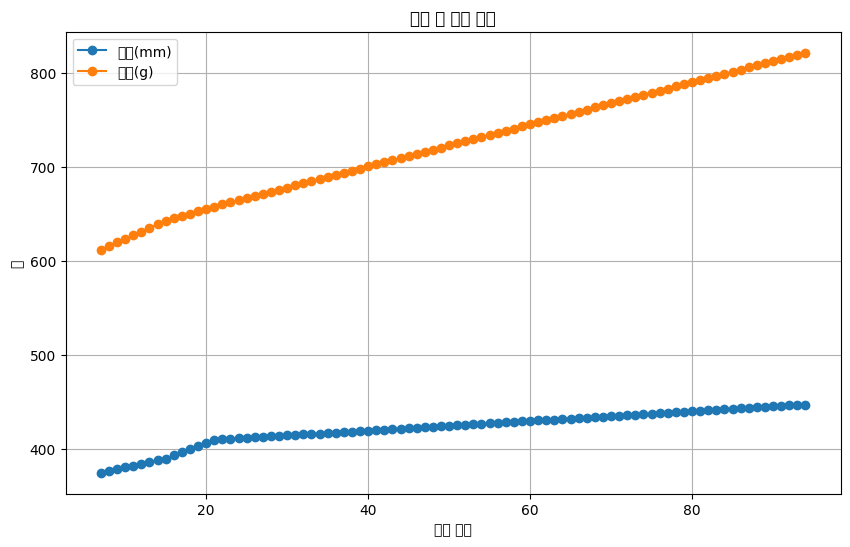

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.plot(df.index, df['체장(mm)'], marker='o', label='체장(mm)')  # 체장 데이터 plot
plt.plot(df.index, df['체중(g)'], marker='o', label='체중(g)')  # 체중 데이터 plot
plt.xlabel('지난 일수')  # x축 레이블
plt.ylabel('값')  # y축 레이블
plt.title('체장 및 체중 변화')  # 그래프 제목
plt.legend()  # 범례 추가
plt.grid(True)  # 그리드 추가
plt.show()  # 그래프 출력


# IC 양식장

In [ ]:
ic_group = grouped.get_group("IC")
ic_group = ic_group.dropna(subset=['일일 사료 급이량(KG)'])
ic_group
ic_group[ic_group['날짜'] == 220704]
print(ic_group['날짜'].unique())

[220704 220705 220706 220707 220711 220712 220713 220714 220718 220719
 220720 220721 220722 220725 220726 220727 220728 220801 220802 220819
 220822 220823 220824 220825 220829 220830 220831 220901 220902 220907
 220908 220913 220914 220916 220919 220920 220922 220926 220928 220929
 220930 221004 221005 221006 221011 221012 221013 221014 221017 221018
 221019 221020 221024 221025 221026 221027 221028 221031 221101 221102
 221107 221110 221111]


# HM 양식장

In [ ]:
hm_group = grouped.get_group("HM")
hm_group = hm_group.dropna(subset=['일일 사료 급이량(KG)'])
hm_group
hm_group[hm_group['날짜'] == 220719]
print(hm_group['날짜'].unique())

[220705 220706 220707 220711 220712 220713 220714 220718 220719 220720
 220721 220722 220725 220726 220727 220728 220801 220901 220902 220907
 220908 220913 220914 220915 220916 220919 220920 220921 220922 220926
 220927 220928 220929 220930 221004 221005 221006 221011 221012 221013
 221014 221017 221018 221019 221020 221024 221025 221026 221101 221102
 221107]


# TP 양식장

In [ ]:
tp_group = grouped.get_group("TP")
tp_group = tp_group.dropna(subset=['일일 사료 급이량(KG)'])
tp_group
tp_group[tp_group['날짜'] == 220706]
print(tp_group['날짜'].unique())

[220706 220707 220713 220714 220721 220722 220727 220728 220804 220805
 220810 220811 220901 220902 220908 220915 220916 220921 220922 220929
 220930 221006 221014 221019 221020 221027 221028]


# 사료 정보가 있는 양식장에 대해서 xgboost train

In [ ]:
for item in ['OS','IC','HM','TP','GM', 'JH'] :
  group = grouped.get_group(item)
  group = group.dropna(subset=['개별 사료 급이량(g)'])


  group['날짜'] = pd.to_datetime(group['날짜'], format='%y%m%d')
  group['지난 일수'] = (group['날짜'] - group['날짜'].iloc[0]).dt.days
  group.drop(columns='날짜', inplace=True)
  day_list = group['지난 일수'].unique()

  df = group.groupby('지난 일수')['체장(mm)', '체중(g)','개별 사료 급이량(g)'].median()
  temp = len(df)
  for _ in range(temp) :
    df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
    df = df.iloc[0:1].append(df[df['체중(g)'].diff() >= 0])

  last_day = df.index.max()
  new_index = pd.Index(range(last_day + 1), name='지난 일수')

  # 지난 일수를 인덱스로 설정하고 새로운 인덱스와 합쳐서 결측치 보간
  df = df.reindex(new_index).interpolate(method='linear')
  df['7일 후 체장(mm)'] = df['체장(mm)'].shift(-7)
  df['7일 후 체중(g)'] = df['체중(g)'].shift(-7)

  # 뒤의 7개 행 삭제
  df = df[:-7]
  df.to_csv("/content/" + item + "_data.csv", index=False)

  display(df)

<ipython-input-321-3be069174c30>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = group.groupby('지난 일수')['체장(mm)', '체중(g)','개별 사료 급이량(g)'].median()
<ipython-input-321-3be069174c30>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-321-3be069174c30>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체중(g)'].diff() >= 0])
<ipython-input-321-3be069174c30>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-321-3be069174c30>:15: FutureWarning: The frame.append method is deprec

,체장(mm),체중(g),개별 사료 급이량(g),7일 후 체장(mm),7일 후 체중(g)
지난 일수,,,,,
0,315.000000,332.000000,28.571429,345.714286,374.428571
1,320.000000,338.166667,28.571429,346.428571,379.857143
2,325.000000,344.333333,28.571429,347.142857,385.285714
3,330.000000,350.500000,28.571429,347.857143,390.714286
4,335.000000,356.666667,28.571429,348.571429,396.142857
5,340.000000,362.833333,28.571429,349.285714,401.571429
6,345.000000,369.000000,28.571429,350.000000,407.000000
7,345.714286,374.428571,28.571429,352.500000,416.312500
8,346.428571,379.857143,28.571429,355.000000,425.625000


<ipython-input-321-3be069174c30>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = group.groupby('지난 일수')['체장(mm)', '체중(g)','개별 사료 급이량(g)'].median()
<ipython-input-321-3be069174c30>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-321-3be069174c30>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체중(g)'].diff() >= 0])
<ipython-input-321-3be069174c30>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-321-3be069174c30>:15: FutureWarning: The frame.append method is deprec

,체장(mm),체중(g),개별 사료 급이량(g),7일 후 체장(mm),7일 후 체중(g)
지난 일수,,,,,
0,345.000000,480.000000,29.090909,359.000000,541.600000
1,347.000000,488.800000,28.888757,361.000000,550.400000
2,349.000000,497.600000,28.686605,363.000000,559.200000
3,351.000000,506.400000,28.484454,365.000000,568.000000
4,353.000000,515.200000,28.282302,367.000000,576.800000
...,...,...,...,...,...
91,441.849315,796.863014,33.463903,445.445205,812.541096
92,442.363014,799.102740,33.630286,445.958904,814.780822
93,442.876712,801.342466,33.796669,446.472603,817.020548


<ipython-input-321-3be069174c30>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = group.groupby('지난 일수')['체장(mm)', '체중(g)','개별 사료 급이량(g)'].median()
<ipython-input-321-3be069174c30>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-321-3be069174c30>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체중(g)'].diff() >= 0])
<ipython-input-321-3be069174c30>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-321-3be069174c30>:15: FutureWarning: The frame.append method is deprec

,체장(mm),체중(g),개별 사료 급이량(g),7일 후 체장(mm),7일 후 체중(g)
지난 일수,,,,,
0,235.000000,136.00,21.917808,260.0,173.000000
1,235.000000,136.00,14.598540,260.0,175.571429
2,240.000000,149.00,14.507772,260.0,178.142857
3,241.250000,150.75,14.640228,260.0,180.714286
4,242.500000,152.50,14.772683,260.0,183.285714
...,...,...,...,...,...
87,318.333333,337.00,24.221267,323.5,352.600000
88,318.750000,338.00,24.288400,324.5,360.700000
89,319.166667,339.00,24.355532,325.5,368.800000


<ipython-input-321-3be069174c30>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = group.groupby('지난 일수')['체장(mm)', '체중(g)','개별 사료 급이량(g)'].median()
<ipython-input-321-3be069174c30>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-321-3be069174c30>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체중(g)'].diff() >= 0])
<ipython-input-321-3be069174c30>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-321-3be069174c30>:15: FutureWarning: The frame.append method is deprec

,체장(mm),체중(g),개별 사료 급이량(g),7일 후 체장(mm),7일 후 체중(g)
지난 일수,,,,,
0,345.000000,412.000000,22.857143,346.666667,414.666667
1,345.238095,412.380952,22.857143,346.904762,415.047619
2,345.476190,412.761905,22.857143,347.142857,415.428571
3,345.714286,413.142857,22.857143,347.380952,415.809524
4,345.952381,413.523810,22.857143,347.619048,416.190476
...,...,...,...,...,...
89,401.250000,596.500000,30.625000,405.227273,616.545455
90,401.818182,599.363636,30.681818,405.795455,619.409091
91,402.386364,602.227273,30.738636,406.363636,622.272727


<ipython-input-321-3be069174c30>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = group.groupby('지난 일수')['체장(mm)', '체중(g)','개별 사료 급이량(g)'].median()
<ipython-input-321-3be069174c30>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-321-3be069174c30>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체중(g)'].diff() >= 0])
<ipython-input-321-3be069174c30>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-321-3be069174c30>:15: FutureWarning: The frame.append method is deprec

,체장(mm),체중(g),개별 사료 급이량(g),7일 후 체장(mm),7일 후 체중(g)
지난 일수,,,,,
0,130.0,18.000000,10.0,172.0,48.333333
1,136.0,22.333333,10.0,178.0,52.666667
2,142.0,26.666667,10.0,184.0,57.000000
3,148.0,31.000000,10.0,190.0,61.333333
4,154.0,35.333333,10.0,196.0,65.666667
5,160.0,39.666667,10.0,202.0,70.000000
6,166.0,44.000000,10.0,208.0,74.333333
7,172.0,48.333333,10.0,214.0,78.666667
8,178.0,52.666667,10.0,220.0,83.000000


<ipython-input-321-3be069174c30>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = group.groupby('지난 일수')['체장(mm)', '체중(g)','개별 사료 급이량(g)'].median()
<ipython-input-321-3be069174c30>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-321-3be069174c30>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체중(g)'].diff() >= 0])
<ipython-input-321-3be069174c30>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-321-3be069174c30>:15: FutureWarning: The frame.append method is deprec

,체장(mm),체중(g),개별 사료 급이량(g),7일 후 체장(mm),7일 후 체중(g)
지난 일수,,,,,
0,360.0,464.5,28.571429,385.0,617.5


In [ ]:
# sample prediction
for item in ['HD'] :
  group = grouped.get_group(item)
  group = group.dropna(subset=['개별 사료 급이량(g)'])

  df = group[['체장(mm)','체중(g)','개별 사료 급이량(g)']]
  df.to_csv("/content/" + item + "_data.csv", index=False)


In [ ]:
from sklearn.multioutput import MultiOutputRegressor
import xgboost as xgb
# 예측에 사용될 XGBoost 회귀 모델
xgboost1 = xgb.XGBRegressor(n_estimators=127, learning_rate=0.021898258169272777, max_depth=10, subsample=0.23674587377491732, colsample_bytree=0.5444135262955686, min_child_weight=9)
xgboost2 = xgb.XGBRegressor(n_estimators=141, learning_rate=0.07232355223857091, max_depth=14, subsample=0.5396814195675023, colsample_bytree=0.9885808645892251, min_child_weight=7)

# OS 양식장을 test 양식장으로 선정
data1 = pd.read_csv("/content/OS_data.csv")
data2 = pd.read_csv("/content/IC_data.csv")
data3 = pd.read_csv("/content/HM_data.csv")
data4 = pd.read_csv("/content/TP_data.csv")
data5 = pd.read_csv("/content/GM_data.csv")

df_list = [ data2, data3, data4, data5]
df_test = data1
train_data = pd.concat(df_list)
train_data = train_data.sample(frac=1).reset_index()

test_data = df_test
test_data = test_data

X_train = train_data[['체장(mm)','체중(g)','개별 사료 급이량(g)']]
X_test = test_data[['체장(mm)','체중(g)','개별 사료 급이량(g)']]

y_train_1 = train_data['7일 후 체장(mm)']
xgboost1.fit(X_train, y_train_1)
prediction1 = xgboost1.predict(X_test)


X_test['7일 후 체장(mm)'] = prediction1
X_train = train_data[['체장(mm)','체중(g)','개별 사료 급이량(g)','7일 후 체장(mm)']]
y_train_2 = train_data['7일 후 체중(g)']
xgboost2.fit(X_train, y_train_2)
prediction2 = xgboost2.predict(X_test)


<ipython-input-344-21bc6edcb394>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['7일 후 체장(mm)'] = prediction1


In [ ]:
import pickle
with open('xgb_length.pkl', 'wb') as f:
    pickle.dump(xgboost1, f)
with open('xgb_weight.pkl', 'wb') as f:
    pickle.dump(xgboost2, f)

In [ ]:
import shutil
shutil.move('/content/xgb_length.pkl','/content/drive/MyDrive/Fish_growth')
shutil.move('/content/xgb_weight.pkl','/content/drive/MyDrive/Fish_growth')


'/content/drive/MyDrive/Fish_growth/xgb_weight.pkl'

In [ ]:
result = X_test
result['7일 후 체장(mm)'] = prediction1
result['7일 후 체중(g)'] = prediction2

<ipython-input-345-2dc259e04e86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['7일 후 체장(mm)'] = prediction1


In [ ]:
display(result)

,체장(mm),체중(g),개별 사료 급이량(g),7일 후 체장(mm),7일 후 체중(g)
0,315.000000,332.000000,28.571429,334.393646,335.706360
1,320.000000,338.166667,28.571429,344.155273,386.943359
2,325.000000,344.333333,28.571429,354.866394,392.059631
3,330.000000,350.500000,28.571429,354.866394,392.059631
4,335.000000,356.666667,28.571429,354.866394,392.059631
5,340.000000,362.833333,28.571429,354.866394,392.059631
6,345.000000,369.000000,28.571429,357.167358,410.250092
7,345.714286,374.428571,28.571429,358.159332,409.456696
8,346.428571,379.857143,28.571429,358.159332,409.854156
9,347.142857,385.285714,28.571429,358.354767,411.617096


In [ ]:
!pip install optuna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 13.2 MB/s eta 0:00:00


# 하이퍼 파라미터 튜닝 (체장예측)

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import optuna

def objective(trial):
    params = {
        "objective": "reg:squarederror",
        "n_estimators": trial.suggest_int("n_estimators", 10, 180),
        "verbosity": 0,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 18),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 0, 10),
        'tree_method': 'gpu_hist',
    }
    prediction = []
    error_list = []


    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train, verbose=False)

    y_pred = model.predict(X_valid)

    prediction.append(y_pred)
    error_list.append(y_valid - y_pred)

    # mae 평가
    mse = mean_squared_error(y_valid, y_pred)


    return mse


df = pd.DataFrame(columns=['learning_rate', 'max_depth', 'subsample', 'colsample_bytree', 'min_child_weight'])

for i in range(1,2) :
    data = train_data

    X_train = X_train
    X_valid = X_test
    y_train = y_train_1
    y_valid = test_data['7일 후 체장(mm)']

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=100)

    print("%d 번째" % i)
    print('Best hyperparameters:', study.best_params)
    print('Best MSE:', study.best_value)
    df = df.append(study.best_params, ignore_index=True)


[I 2023-11-13 11:16:28,879] A new study created in memory with name: no-name-aed5223e-ec46-4786-8f1d-38d0534ae170
[I 2023-11-13 11:16:29,119] Trial 0 finished with value: 112.95272929537606 and parameters: {'n_estimators': 91, 'learning_rate': 0.004628967428616745, 'max_depth': 12, 'subsample': 0.8590633843874332, 'colsample_bytree': 0.8960084948124593, 'min_child_weight': 1}. Best is trial 0 with value: 112.95272929537606.
[I 2023-11-13 11:16:29,271] Trial 1 finished with value: 121.0769835523824 and parameters: {'n_estimators': 92, 'learning_rate': 0.0014216183782307724, 'max_depth': 5, 'subsample': 0.8224690893807306, 'colsample_bytree': 0.6564417645289853, 'min_child_weight': 1}. Best is trial 0 with value: 112.95272929537606.
[I 2023-11-13 11:16:29,455] Trial 2 finished with value: 114.90823415741228 and parameters: {'n_estimators': 112, 'learning_rate': 0.0062744477778650274, 'max_depth': 8, 'subsample': 0.6983428257299804, 'colsample_bytree': 0.7589458112473795, 'min_child_weigh

1 번째
Best hyperparameters: {'n_estimators': 127, 'learning_rate': 0.021898258169272777, 'max_depth': 10, 'subsample': 0.23674587377491732, 'colsample_bytree': 0.5444135262955686, 'min_child_weight': 9}
Best RMSE: 17.021034822626785


<ipython-input-333-11e0ce284c20>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(study.best_params, ignore_index=True)


# 하이퍼파라미터 튜닝(체중 예측)

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import optuna

def objective(trial):
    params = {
        "objective": "reg:squarederror",
        "n_estimators": trial.suggest_int("n_estimators", 10, 180),
        "verbosity": 0,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 18),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 0, 10),
        'tree_method': 'gpu_hist',
    }
    prediction = []
    error_list = []


    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train, verbose=False)

    y_pred = model.predict(X_valid)

    prediction.append(y_pred)
    error_list.append(y_valid - y_pred)

    # mae 평가
    mse = mean_squared_error(y_valid, y_pred)


    return mse


df = pd.DataFrame(columns=['learning_rate', 'max_depth', 'subsample', 'colsample_bytree', 'min_child_weight'])

for i in range(1,2) :
    data = train_data

    X_train = X_train
    X_valid = X_test
    y_train = y_train_2
    y_valid = test_data['7일 후 체중(g)']

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=1000)

    print("%d 번째" % i)
    print('Best hyperparameters:', study.best_params)
    print('Best MSE:', study.best_value)
    df = df.append(study.best_params, ignore_index=True)


[I 2023-11-13 11:29:20,285] A new study created in memory with name: no-name-9253486c-c269-4542-9490-ebc7b57f33a8
[I 2023-11-13 11:29:20,669] Trial 0 finished with value: 177.09280061042276 and parameters: {'n_estimators': 170, 'learning_rate': 0.0867083262481577, 'max_depth': 16, 'subsample': 0.5375400326797526, 'colsample_bytree': 0.7665998912242662, 'min_child_weight': 7}. Best is trial 0 with value: 177.09280061042276.
[I 2023-11-13 11:29:20,783] Trial 1 finished with value: 511.50360484140236 and parameters: {'n_estimators': 95, 'learning_rate': 0.0447380994599908, 'max_depth': 3, 'subsample': 0.14633225173543718, 'colsample_bytree': 0.5555810470910397, 'min_child_weight': 0}. Best is trial 0 with value: 177.09280061042276.
[I 2023-11-13 11:29:20,994] Trial 2 finished with value: 2116.890038686157 and parameters: {'n_estimators': 150, 'learning_rate': 0.0026330335170418233, 'max_depth': 5, 'subsample': 0.4152863253923398, 'colsample_bytree': 0.9751814494027586, 'min_child_weight':

1 번째
Best hyperparameters: {'n_estimators': 141, 'learning_rate': 0.07232355223857091, 'max_depth': 14, 'subsample': 0.5396814195675023, 'colsample_bytree': 0.9885808645892251, 'min_child_weight': 7}
Best MSE: 120.53938187183478


<ipython-input-343-1c409b651013>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(study.best_params, ignore_index=True)
